## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### MSE Threshold and Mean Coeff Values 

1. Fetch MSE threshold for training the ABC-GAN 
2. The ABC-GAN will be trained until the threshold MSE is achieved or until it completes 5000 epochs 
3. The threshold mse is the mean mse of Catboost over 10 runs

In [9]:
books = sb.read_notebooks('./BaseLine_Model_Output')
catboostMSE = []
for nb in books.notebooks: 
    catboostMSE.append(nb.scraps['Catboost MSE'].data)
    
#Threshold MSE     
threshold_mse = mean(catboostMSE)

print(threshold_mse)

0.10094117185431159


# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [10]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.034573
0:	learn: 0.9806058	total: 65.7ms	remaining: 1m 5s
1:	learn: 0.9606716	total: 66.6ms	remaining: 33.2s
2:	learn: 0.9390920	total: 67.5ms	remaining: 22.4s
3:	learn: 0.9209237	total: 68.2ms	remaining: 17s
4:	learn: 0.9046978	total: 69ms	remaining: 13.7s
5:	learn: 0.8896854	total: 69.9ms	remaining: 11.6s
6:	learn: 0.8724151	total: 70.6ms	remaining: 10s
7:	learn: 0.8558633	total: 71.4ms	remaining: 8.85s
8:	learn: 0.8400199	total: 72.1ms	remaining: 7.94s
9:	learn: 0.8229065	total: 72.8ms	remaining: 7.21s
10:	learn: 0.8057776	total: 73.6ms	remaining: 6.62s
11:	learn: 0.7907426	total: 74.3ms	remaining: 6.12s
12:	learn: 0.7753485	total: 75.1ms	remaining: 5.7s
13:	learn: 0.7601130	total: 75.8ms	remaining: 5.34s
14:	learn: 0.7475256	total: 76.5ms	remaining: 5.03s
15:	learn: 0.7326054	total: 77.3ms	remaining: 4.75s
16:	learn: 0.7206853	total: 78ms	remaining: 4.51s
17:	learn: 0.7077303	total: 78.7ms	remaining: 4.29s
18:	learn: 0.6955287	total: 79.5ms	remaining: 4.11s
1

88:	learn: 0.3267592	total: 136ms	remaining: 1.39s
89:	learn: 0.3246472	total: 136ms	remaining: 1.38s
90:	learn: 0.3226321	total: 137ms	remaining: 1.37s
91:	learn: 0.3208859	total: 138ms	remaining: 1.36s
92:	learn: 0.3195327	total: 139ms	remaining: 1.35s
93:	learn: 0.3177265	total: 140ms	remaining: 1.35s
94:	learn: 0.3159930	total: 141ms	remaining: 1.35s
95:	learn: 0.3146725	total: 142ms	remaining: 1.34s
96:	learn: 0.3128617	total: 143ms	remaining: 1.33s
97:	learn: 0.3114186	total: 144ms	remaining: 1.32s
98:	learn: 0.3101878	total: 145ms	remaining: 1.32s
99:	learn: 0.3091652	total: 146ms	remaining: 1.31s
100:	learn: 0.3073446	total: 147ms	remaining: 1.3s
101:	learn: 0.3059717	total: 148ms	remaining: 1.3s
102:	learn: 0.3044976	total: 148ms	remaining: 1.29s
103:	learn: 0.3030824	total: 149ms	remaining: 1.28s
104:	learn: 0.3013455	total: 150ms	remaining: 1.28s
105:	learn: 0.2996238	total: 151ms	remaining: 1.27s
106:	learn: 0.2980370	total: 151ms	remaining: 1.26s
107:	learn: 0.2965967	tota

149:	learn: 0.2534840	total: 188ms	remaining: 1.06s
150:	learn: 0.2527124	total: 189ms	remaining: 1.06s
151:	learn: 0.2520669	total: 190ms	remaining: 1.06s
152:	learn: 0.2511829	total: 190ms	remaining: 1.05s
153:	learn: 0.2507161	total: 191ms	remaining: 1.05s
154:	learn: 0.2497802	total: 192ms	remaining: 1.05s
155:	learn: 0.2490613	total: 193ms	remaining: 1.04s
156:	learn: 0.2484356	total: 194ms	remaining: 1.04s
157:	learn: 0.2475208	total: 195ms	remaining: 1.04s
158:	learn: 0.2467460	total: 196ms	remaining: 1.03s
159:	learn: 0.2461317	total: 197ms	remaining: 1.03s
160:	learn: 0.2456028	total: 197ms	remaining: 1.03s
161:	learn: 0.2449256	total: 198ms	remaining: 1.02s
162:	learn: 0.2444113	total: 199ms	remaining: 1.02s
163:	learn: 0.2438126	total: 200ms	remaining: 1.02s
164:	learn: 0.2432080	total: 201ms	remaining: 1.01s
165:	learn: 0.2425986	total: 201ms	remaining: 1.01s
166:	learn: 0.2421108	total: 202ms	remaining: 1.01s
167:	learn: 0.2413956	total: 204ms	remaining: 1.01s
168:	learn: 

309:	learn: 0.1740813	total: 326ms	remaining: 726ms
310:	learn: 0.1738419	total: 327ms	remaining: 725ms
311:	learn: 0.1734089	total: 328ms	remaining: 723ms
312:	learn: 0.1731178	total: 329ms	remaining: 722ms
313:	learn: 0.1727077	total: 330ms	remaining: 721ms
314:	learn: 0.1723778	total: 331ms	remaining: 719ms
315:	learn: 0.1720145	total: 331ms	remaining: 717ms
316:	learn: 0.1715627	total: 332ms	remaining: 716ms
317:	learn: 0.1714053	total: 333ms	remaining: 714ms
318:	learn: 0.1709797	total: 334ms	remaining: 712ms
319:	learn: 0.1706233	total: 335ms	remaining: 711ms
320:	learn: 0.1703284	total: 335ms	remaining: 709ms
321:	learn: 0.1700544	total: 336ms	remaining: 708ms
322:	learn: 0.1696955	total: 337ms	remaining: 707ms
323:	learn: 0.1695203	total: 338ms	remaining: 705ms
324:	learn: 0.1693707	total: 339ms	remaining: 703ms
325:	learn: 0.1690932	total: 340ms	remaining: 702ms
326:	learn: 0.1687871	total: 340ms	remaining: 701ms
327:	learn: 0.1684932	total: 341ms	remaining: 699ms
328:	learn: 

370:	learn: 0.1564609	total: 379ms	remaining: 642ms
371:	learn: 0.1560608	total: 380ms	remaining: 641ms
372:	learn: 0.1558547	total: 381ms	remaining: 640ms
373:	learn: 0.1555605	total: 382ms	remaining: 639ms
374:	learn: 0.1552292	total: 382ms	remaining: 637ms
375:	learn: 0.1549435	total: 383ms	remaining: 636ms
376:	learn: 0.1546544	total: 384ms	remaining: 635ms
377:	learn: 0.1543066	total: 385ms	remaining: 633ms
378:	learn: 0.1540311	total: 386ms	remaining: 632ms
379:	learn: 0.1536233	total: 387ms	remaining: 631ms
380:	learn: 0.1533239	total: 387ms	remaining: 629ms
381:	learn: 0.1530299	total: 388ms	remaining: 628ms
382:	learn: 0.1528336	total: 389ms	remaining: 627ms
383:	learn: 0.1526162	total: 390ms	remaining: 625ms
384:	learn: 0.1523426	total: 391ms	remaining: 624ms
385:	learn: 0.1521042	total: 391ms	remaining: 623ms
386:	learn: 0.1518990	total: 392ms	remaining: 621ms
387:	learn: 0.1516118	total: 393ms	remaining: 620ms
388:	learn: 0.1513630	total: 394ms	remaining: 618ms
389:	learn: 

529:	learn: 0.1232458	total: 517ms	remaining: 458ms
530:	learn: 0.1230684	total: 518ms	remaining: 457ms
531:	learn: 0.1229753	total: 519ms	remaining: 456ms
532:	learn: 0.1229118	total: 519ms	remaining: 455ms
533:	learn: 0.1227483	total: 520ms	remaining: 454ms
534:	learn: 0.1227345	total: 521ms	remaining: 453ms
535:	learn: 0.1226136	total: 522ms	remaining: 452ms
536:	learn: 0.1225049	total: 523ms	remaining: 451ms
537:	learn: 0.1223317	total: 524ms	remaining: 450ms
538:	learn: 0.1221160	total: 525ms	remaining: 449ms
539:	learn: 0.1219316	total: 526ms	remaining: 448ms
540:	learn: 0.1217415	total: 527ms	remaining: 447ms
541:	learn: 0.1214753	total: 528ms	remaining: 446ms
542:	learn: 0.1212860	total: 528ms	remaining: 445ms
543:	learn: 0.1211131	total: 529ms	remaining: 444ms
544:	learn: 0.1208536	total: 530ms	remaining: 443ms
545:	learn: 0.1207734	total: 531ms	remaining: 442ms
546:	learn: 0.1205887	total: 532ms	remaining: 440ms
547:	learn: 0.1203470	total: 533ms	remaining: 439ms
548:	learn: 

591:	learn: 0.1128132	total: 570ms	remaining: 393ms
592:	learn: 0.1126699	total: 571ms	remaining: 392ms
593:	learn: 0.1125247	total: 572ms	remaining: 391ms
594:	learn: 0.1123135	total: 573ms	remaining: 390ms
595:	learn: 0.1120719	total: 573ms	remaining: 389ms
596:	learn: 0.1118641	total: 574ms	remaining: 388ms
597:	learn: 0.1116640	total: 575ms	remaining: 387ms
598:	learn: 0.1114721	total: 576ms	remaining: 386ms
599:	learn: 0.1113192	total: 577ms	remaining: 385ms
600:	learn: 0.1111923	total: 578ms	remaining: 384ms
601:	learn: 0.1109718	total: 579ms	remaining: 383ms
602:	learn: 0.1108705	total: 580ms	remaining: 382ms
603:	learn: 0.1106417	total: 581ms	remaining: 381ms
604:	learn: 0.1104217	total: 582ms	remaining: 380ms
605:	learn: 0.1103460	total: 582ms	remaining: 379ms
606:	learn: 0.1101823	total: 583ms	remaining: 378ms
607:	learn: 0.1100396	total: 584ms	remaining: 377ms
608:	learn: 0.1099385	total: 585ms	remaining: 376ms
609:	learn: 0.1098121	total: 586ms	remaining: 375ms
610:	learn: 

754:	learn: 0.0908138	total: 708ms	remaining: 230ms
755:	learn: 0.0907134	total: 709ms	remaining: 229ms
756:	learn: 0.0906398	total: 709ms	remaining: 228ms
757:	learn: 0.0905546	total: 710ms	remaining: 227ms
758:	learn: 0.0904137	total: 711ms	remaining: 226ms
759:	learn: 0.0903441	total: 712ms	remaining: 225ms
760:	learn: 0.0902583	total: 713ms	remaining: 224ms
761:	learn: 0.0901566	total: 713ms	remaining: 223ms
762:	learn: 0.0900882	total: 714ms	remaining: 222ms
763:	learn: 0.0899894	total: 715ms	remaining: 221ms
764:	learn: 0.0898732	total: 716ms	remaining: 220ms
765:	learn: 0.0897384	total: 717ms	remaining: 219ms
766:	learn: 0.0896966	total: 718ms	remaining: 218ms
767:	learn: 0.0895544	total: 718ms	remaining: 217ms
768:	learn: 0.0893441	total: 719ms	remaining: 216ms
769:	learn: 0.0891873	total: 720ms	remaining: 215ms
770:	learn: 0.0890086	total: 721ms	remaining: 214ms
771:	learn: 0.0888501	total: 722ms	remaining: 213ms
772:	learn: 0.0886622	total: 723ms	remaining: 212ms
773:	learn: 

817:	learn: 0.0839504	total: 761ms	remaining: 169ms
818:	learn: 0.0838712	total: 762ms	remaining: 168ms
819:	learn: 0.0838468	total: 763ms	remaining: 167ms
820:	learn: 0.0836924	total: 764ms	remaining: 166ms
821:	learn: 0.0835513	total: 764ms	remaining: 166ms
822:	learn: 0.0834487	total: 765ms	remaining: 165ms
823:	learn: 0.0833678	total: 766ms	remaining: 164ms
824:	learn: 0.0833064	total: 767ms	remaining: 163ms
825:	learn: 0.0831463	total: 768ms	remaining: 162ms
826:	learn: 0.0830545	total: 768ms	remaining: 161ms
827:	learn: 0.0829920	total: 769ms	remaining: 160ms
828:	learn: 0.0829252	total: 770ms	remaining: 159ms
829:	learn: 0.0827970	total: 771ms	remaining: 158ms
830:	learn: 0.0826774	total: 772ms	remaining: 157ms
831:	learn: 0.0826484	total: 772ms	remaining: 156ms
832:	learn: 0.0825145	total: 773ms	remaining: 155ms
833:	learn: 0.0823617	total: 774ms	remaining: 154ms
834:	learn: 0.0822500	total: 775ms	remaining: 153ms
835:	learn: 0.0822379	total: 776ms	remaining: 152ms
836:	learn: 

980:	learn: 0.0701088	total: 898ms	remaining: 17.4ms
981:	learn: 0.0700578	total: 899ms	remaining: 16.5ms
982:	learn: 0.0700271	total: 900ms	remaining: 15.6ms
983:	learn: 0.0699035	total: 901ms	remaining: 14.7ms
984:	learn: 0.0697808	total: 902ms	remaining: 13.7ms
985:	learn: 0.0696729	total: 903ms	remaining: 12.8ms
986:	learn: 0.0695978	total: 904ms	remaining: 11.9ms
987:	learn: 0.0695103	total: 905ms	remaining: 11ms
988:	learn: 0.0694633	total: 905ms	remaining: 10.1ms
989:	learn: 0.0693641	total: 906ms	remaining: 9.15ms
990:	learn: 0.0693544	total: 907ms	remaining: 8.24ms
991:	learn: 0.0692877	total: 908ms	remaining: 7.32ms
992:	learn: 0.0691795	total: 909ms	remaining: 6.41ms
993:	learn: 0.0690561	total: 910ms	remaining: 5.49ms
994:	learn: 0.0689593	total: 911ms	remaining: 4.58ms
995:	learn: 0.0688740	total: 912ms	remaining: 3.66ms
996:	learn: 0.0688345	total: 912ms	remaining: 2.75ms
997:	learn: 0.0688269	total: 913ms	remaining: 1.83ms
998:	learn: 0.0687463	total: 914ms	remaining: 91

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.19944363916797153


#### Sanity Checks 

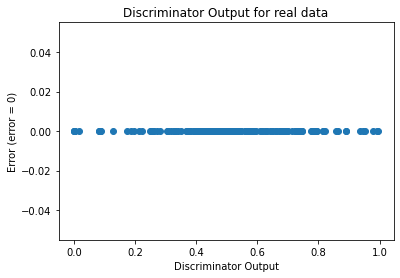

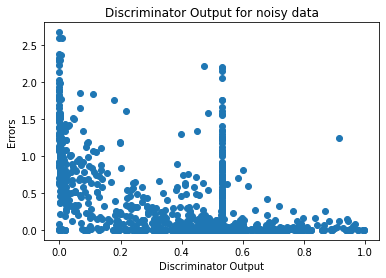

In [14]:
sanityChecks.discProbVsError(real_dataset,disc,device)

**Training ABC-GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [15]:
gen2 = network.Generator(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [16]:
discLossA2,genLossA2 = ABC_train_test2.training_GAN_2(disc2,gen2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_2 Generator Loss",genLossA2)
sb.glue("ABC_GAN_2 Discriminator Loss",discLossA2)

Number of epochs 554


In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,"2",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MSE")
print(mean(ABC_GAN2_metrics[0]))

MSE
0.11824016223044573


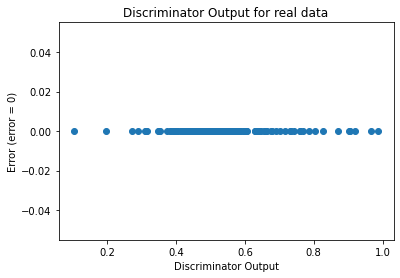

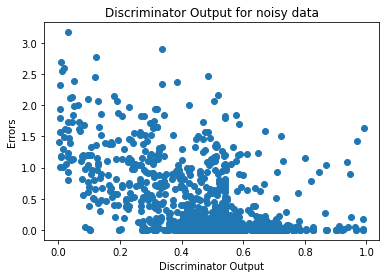

In [18]:
sanityChecks.discProbVsError(real_dataset,disc2,device)

# ABC - GAN Model with skip connection

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.18107395641121543


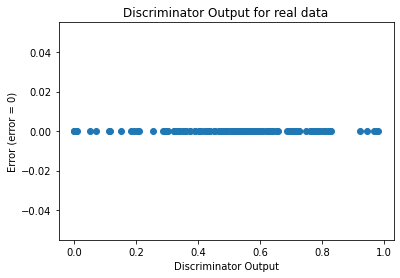

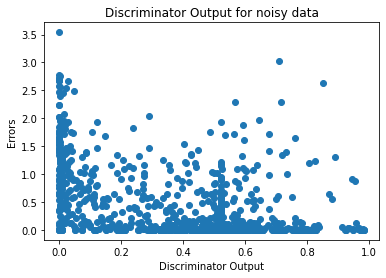

In [22]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [23]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7173]], requires_grad=True)
